# Lets train a Logistic Regression classifier to predict those who survived the Titanic.

### Load Required Libraries

In [1938]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  


### Load the Titanic Dataset

In [1939]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The attributes have the following meaning:
* **PassengerId**: a unique identifier for each passenger
* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

### Data Preprocessing

Let's explicitly set the `PassengerId` column as the index column:

In [1940]:
df = df.set_index('PassengerId')
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Let's get more info to see how much data is missing:

In [1941]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


Check for missing values:

In [1942]:
df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

Let's take a look at the numerical attributes:

In [1943]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413500,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Let's check that the target is indeed 0 or 1:

In [1944]:
df["Survived"].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

Now let's take a quick look at all the categorical attributes:

In [1945]:
df["Pclass"].value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [1946]:
df["Sex"].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

In [1947]:
df["Embarked"].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

The Embarked attribute tells us where the passenger embarked: C=Cherbourg, Q=Queenstown, S=Southampton.

Fill or drop missing data:

In [1948]:
# Fill missing values for 'Age' with the median
df['Age'].fillna(df['Age'].median(), inplace=True)  

C:\Users\click\AppData\Local\Temp\ipykernel_24860\3802356909.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [1949]:
# Drop the 'Cabin' column as it has too many missing values
df.drop(columns=['Cabin'], inplace=True)  

In [1950]:
# Fill missing 'Embarked' with the most common port
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) 

C:\Users\click\AppData\Local\Temp\ipykernel_24860\1283591977.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [1951]:
# Drop 'Survived' rows with NaN values
df.dropna(subset=["Survived"], how='any', inplace=True)

### Feature Selection

Separate the features (X) and the target labels (y) from the df dataset.

In [1952]:
X, y = df.iloc[:, 1:], df.iloc[:, 0]

X.head(3)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [1953]:
y.head(3)

PassengerId
1    0.0
2    1.0
3    1.0
Name: Survived, dtype: float64

### Train-Test Split

Split the dataset into training and testing sets using train_test_split.

In [1954]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                     random_state=0, stratify=y)

### Pipelines and Feature Scaling

Now let's build our preprocessing pipelines, starting with the pipeline for numerical attributes and then normalize features:

In [1955]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
    ])

Now we can build the pipeline for the categorical attributes and then normalize features:

In [1956]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

cat_pipeline = Pipeline([
        ("ordinal_encoder", OrdinalEncoder()),    
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
    ])

Finally, let's join the numerical and categorical pipelines:

In [1957]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [1958]:
X_train_std = preprocess_pipeline.fit_transform(X_train)
X_train_std

array([[-0.01671958, -0.48092174, -0.47973535, ...,  0.        ,
         0.        ,  1.        ],
       [-0.63897507, -0.48092174, -0.47973535, ...,  0.        ,
         0.        ,  1.        ],
       [-0.09450152,  0.44955728, -0.47973535, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.21662622, -0.48092174, -0.47973535, ...,  0.        ,
         0.        ,  1.        ],
       [-0.09450152,  1.38003629, -0.47973535, ...,  1.        ,
         0.        ,  0.        ],
       [-0.56119313, -0.48092174, -0.47973535, ...,  0.        ,
         0.        ,  1.        ]])

Let's get the labels:

In [1959]:
y_train

PassengerId
232    0.0
837    0.0
640    0.0
390    1.0
598    0.0
      ... 
132    0.0
491    0.0
839    1.0
49     0.0
81     0.0
Name: Survived, Length: 623, dtype: float64

### Train the Logistic Regression Classifier

We are now ready to train a classifier. Let's start with a `LogisticRegression`:

In [1960]:
from sklearn.multiclass import OneVsRestClassifier

lr = OneVsRestClassifier(LogisticRegression(C=100.0, solver='lbfgs'))

lr.fit(X_train_std, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=100.0))

### Make Predictions

Our model is trained, let's use it to make predictions on the test set:

In [1961]:
# Use the trained logistic regression model to predict class probabilities for the first three 
# examples in the standardized test set

X_test_std = preprocess_pipeline.transform(X_test)
proba = lr.predict_proba(X_test_std[:3, :])

In [1962]:
# Print the predicted probabilities
print(proba)

[[0.86563113 0.13436887]
 [0.1206908  0.8793092 ]
 [0.97850793 0.02149207]]


In [1963]:
# Sum the predicted probabilities for each sample across all classes
probability_sums = proba.sum(axis=1)

# Print the summed probabilities for the first three samples
print(probability_sums)

[1. 1. 1.]


In [1964]:
# Find the class index with the highest probability for each of the three samples
predicted_classes = proba.argmax(axis=1)

# Print the predicted class indices for the first three samples
print(predicted_classes)

[0 1 0]


In [1965]:
# Use the trained logistic regression model to predict the class labels for the first three examples in the standardized test set
predicted_classes = lr.predict(X_test_std[:3, :])

# Print the predicted class labels for the first three samples
print(predicted_classes)

[0. 1. 0.]


In [1966]:
# Reshape the first standardized test example into a 2D array for prediction
predicted_class = lr.predict(X_test_std[0, :].reshape(1, -1))

# Print the predicted class label for the first sample
print(predicted_class)

[0.]


### Evaluate the Model

Let's evaluate the performance of the trained pipeline on the test set (X_test) using the `score()` method

In [1967]:
y_pred = lr.predict(X_test_std)

test_acc = lr.score(X_test_std, y_test)

print(f"Test accuracy: {test_acc:.3f}")

Test accuracy: 0.806


### Model Tuning (Hyperparameter Tuning)

Let's use `cross-validation` to get a better estimate of our model’s performance.

In [1968]:
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(
    preprocess_pipeline,
    OneVsRestClassifier(LogisticRegression(C=100.0, solver='lbfgs'))
)

In [1969]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train.iloc[train], y_train.iloc[train])
    score = pipe_lr.score(X_train.iloc[test], y_train.iloc[test])
    scores.append(score)
    print(f'Fold: {k+1:02d}, '
          f'Class ditr.: {np.bincount(y_train.iloc[train])}, '
          f'Acc.: {score:.3f}')
    
mean_acc = np.mean(scores)

std_acc = np.std(scores)

print(f'\nCV accuracy: {mean_acc:.3f} +/- {std_acc:.3f}')


Fold: 01, Class ditr.: [345 215], Acc.: 0.762
Fold: 02, Class ditr.: [345 215], Acc.: 0.778
Fold: 03, Class ditr.: [345 215], Acc.: 0.857
Fold: 04, Class ditr.: [345 216], Acc.: 0.742
Fold: 05, Class ditr.: [346 215], Acc.: 0.855
Fold: 06, Class ditr.: [346 215], Acc.: 0.806
Fold: 07, Class ditr.: [346 215], Acc.: 0.726
Fold: 08, Class ditr.: [346 215], Acc.: 0.839
Fold: 09, Class ditr.: [346 215], Acc.: 0.742
Fold: 10, Class ditr.: [346 215], Acc.: 0.806

CV accuracy: 0.791 +/- 0.046


C:\Users\click\AppData\Local\Temp\ipykernel_24860\2625890086.py:13: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  f'Class ditr.: {np.bincount(y_train.iloc[train])}, '
C:\Users\click\AppData\Local\Temp\ipykernel_24860\2625890086.py:13: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  f'Class ditr.: {np.bincount(y_train.iloc[train])}, '
C:\Users\click\AppData\Local\Temp\ipykernel_24860\2625890086.py:13: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  f'Class ditr.: {np.bincount(y_train.iloc[train])}, '
C:\Users\click\AppData\Local\Temp\ipykernel_24860\2625890086.py:13: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  f'Class ditr.: {np.bincou

Let's use Scikit-learn to implement the same stratified k-fold cross-validation less verbosely

In [1970]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.76190476 0.77777778 0.85714286 0.74193548 0.85483871 0.80645161
 0.72580645 0.83870968 0.74193548 0.80645161]
CV accuracy: 0.791 +/- 0.046


Diagnosing bias and variance problems with learning curves

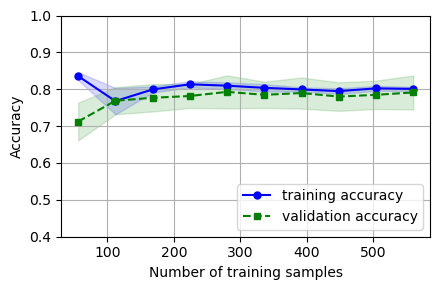

In [1971]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

pipe_lr = make_pipeline(
    preprocess_pipeline,
    OneVsRestClassifier(LogisticRegression(C=100.0, solver='lbfgs', penalty='l2', max_iter=10000))
)

train_size, train_scores, test_scores = learning_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    n_jobs=1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(4.5, 3)) 

plt.plot(train_size, train_mean, 
         color='blue', marker='o', 
         markersize=5, 
         label='training accuracy')

plt.fill_between(train_size,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_size, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_size,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.4, 1.0])
plt.tight_layout()
plt.show()


Addressing over- and underfitting with `validation curves`

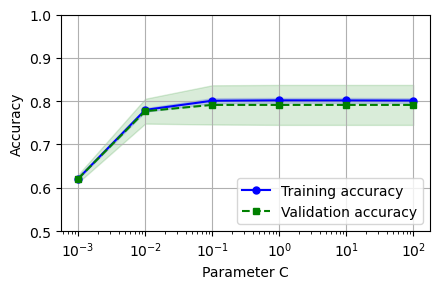

In [1972]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='onevsrestclassifier__estimator__C', 
                param_range=param_range,
                cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(4.5, 3)) 

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                          train_mean - train_std, alpha=0.15,
                          color='blue')
plt.plot(param_range, test_mean,
                          color='green', linestyle='--',
                          marker='s', markersize=5,
                          label='Validation accuracy')
plt.fill_between(param_range,
                          test_mean + test_std,
                          test_mean - test_std,
                          alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

Fine tuning model hyperparameters via `grid search` 

In [1973]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'onevsrestclassifier__estimator__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'onevsrestclassifier__estimator__solver': ['lbfgs', 'liblinear'],  # Solvers to use
    'onevsrestclassifier__estimator__penalty': ['l2']  # Regularization type
}
grid_search = GridSearchCV(
    estimator=pipe_lr,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to optimize
    cv=10,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available cores
    verbose=2  # Print progress messages
)
grid_search.fit(X_train, y_train)   

# Print the best hyperparameters and accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

preprocess_pipeline.transform(X_test)

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set accuracy:", test_score)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best hyperparameters: {'onevsrestclassifier__estimator__C': 0.1, 'onevsrestclassifier__estimator__penalty': 'l2', 'onevsrestclassifier__estimator__solver': 'lbfgs'}
Best cross-validation accuracy: 0.7913466461853559
Test set accuracy: 0.8134328358208955
